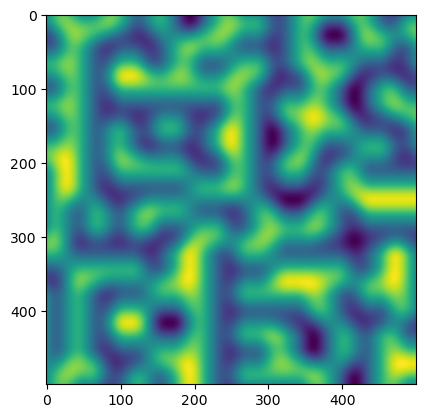

In [44]:

import numpy as np
import matplotlib.pyplot as plot

def perlin(x, y, seed=0):
    # create a permutation table based on number of pixels
    # seed is the initial value we want to start with
    # we also use seed function to get same set of numbers
    # this helps to keep our perlin graph smooth
    np.random.seed(seed)
    ptable = np.arange(256, dtype=int)

    # shuffle our numbers in the table
    np.random.shuffle(ptable)

    # create a 2d array and then turn it one dimensional
    # so that we can apply our dot product interpolations easily
    ptable = np.stack([ptable, ptable]).flatten()
    
    # grid coordinates
    xi, yi = x.astype(int), y.astype(int)
   
    # distance vector coordinates
    xg, yg = x - xi, y - yi
    
    # apply fade function to distance coordinates
    xf, yf = fade(xg), fade(yg)
    
    # the gradient vector coordinates in the top left, top right, bottom left bottom right
   
    n00 = gradient(ptable[ptable[xi] + yi], xg, yg)
    n01 = gradient(ptable[ptable[xi] + yi + 1], xg, yg - 1)
    n11 = gradient(ptable[ptable[xi + 1] + yi + 1], xg - 1, yg - 1)
    n10 = gradient(ptable[ptable[xi + 1] + yi], xg - 1, yg)
    
    # apply linear interpolation i.e dot product to calculate average
    x1 = lerp(n00, n10, xf)
    x2 = lerp(n01, n11, xf)  
    return lerp(x1, x2, yf)  

def lerp(a, b, x):
    "linear interpolation i.e dot product"
    return a + x * (b - a)

# smoothing function,
# the first derivative and second both are zero for this function
def fade(f):
    
    return (6 * f**5) - (15 * f**4) + (10 * f**3)

# calculate the gradient vectors and dot product
def gradient(c, x, y):
   
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    gradient_co = vectors[c % 4]
    return gradient_co[:, :, 0] * x + gradient_co[:, :, 1] * y

# create evenly spaced out numbers in a specified interval
lin_array = np.linspace(1, 10, 500, endpoint=False)

# create grid using linear 1d arrays
x, y = np.meshgrid(lin_array, lin_array)  

# generate graph
plot.imshow(perlin(x, y, seed=2), origin = 'upper')

plot.show()

In [31]:
# grid coordinates
xi, yi = x.astype(int), y.astype(int)

# distance vector coordinates
xg, yg = x - xi, y - yi

# apply fade function to distance coordinates
xf, yf = fade(xg), fade(yg)

In [45]:
import matplotlib.pyplot as plt 
from matplotlib.collections import PolyCollection 
import numpy as np

In [48]:
vertices = np.array([ [0, 0], [1, 0], [0.5, 1], [1.5, 1], [1, 2], [2, 2]])

In [50]:
polygons = [vertices] 
collection = PolyCollection(polygons, closed=False, edgecolors='r')

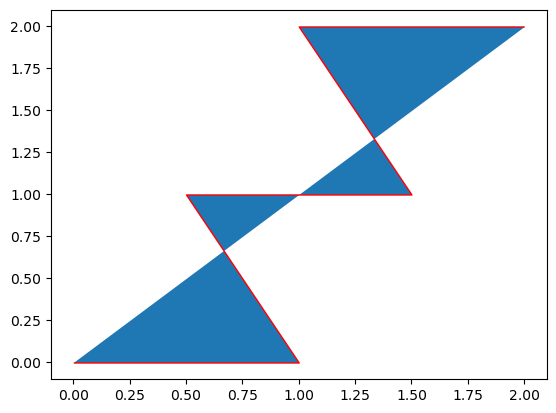

In [52]:
fig, ax = plt.subplots() 
ax.add_collection(collection) 
ax.autoscale_view()